# Desription

*This analysis is done as a part of training on the course Data Analyst from Yandex Prakikum.*


The task:

You work in the Strimchik online store, that sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. You need to identify the patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.
Here is the data up to 2016. Let's say it's December 2016 and you're planning a campaign for 2017. It is necessary to work out the principle of working with data. It doesn't matter if you're forecasting 2017 sales based on 2016 data or 2027 sales based on 2026 data.

The abbreviation ESRB (Entertainment Software Rating Board) in the data set - is an association that determines the age rating of computer games. The ESRB evaluates gaming content and assigns it to an appropriate age rating, such as Mature, Toddler, or Teen campaigns.

## Step 1. Open the data file and study the provided information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data = pd.read_csv('../games.csv')

In [3]:
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Step 1. Conclusion.**

*Data description*

The data is represented by 16715 lines.

There are 11 columns in total:

* Name - the name of the game
* Platform - game's platform
* Year_of_Release - game's year of release
* Genre - game's genre
* NA_sales - sales in North America (millions of copies sold)
* EU_sales - sales in Europe (millions of copies sold)
* JP_sales - sales in Japan (millions of copies sold)
* Other_sales - sales in other countries (millions of copies sold)
* Critic_Score - Critics score (max 100)
* User_Score - user score (maximum 10)
* Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

Data for 2016, according to input data, may be incomplete.

Within this section, we have opened a data file obtained from open sources regarding game sales on various gaming platforms, including genre, sales by 3 regions, and ratings and reviews from users and critics.

The data contains gaps and incorrect type of some cells, so for further correct work with the file in the second step, we will pre-process the data.


## Step 2. Data pre-processing

### 1. Change the columns name (convert to lower case)

In [5]:
data.columns = data.columns.str.lower()

### 2. Convert the data to the required types and replace the gaps

Correction of data types:

    1. Year of release - in the date format as a year
    2. User rating - in float, because this is a numerical value, not a text

Check which columns have empty values.

In [6]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Filling the gaps:

1. Data gaps in the title, genre and year of release will be removed, since the number is insignificant. In addition, we have no justification for filling in this data on our own. The reason for the gaps may be incorrect unloading from the database - some values could not be technically merged into the table.
2. Users' and critics' scores will not be filled with any values since there is a lot of gaps. Filling data with median/average information can only skew correlation analysis results. The emission of gaps may be that the assessment was not made in general for this game, or there may also be an error on the technical side when unloading the data in the table.
3. We will not be able to autofill the gaps in the rating, therefore we will replace it with a "stub". The gaps can be explained both by the absence of the assigned rating by the association, and the inability to load this rating into the summary table. 

In [7]:
data = data.dropna(subset = ['name', 'genre', 'year_of_release']).reset_index(drop=True) # удаляем пустые значения

In [8]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format = '%Y').dt.year # меняем тип данных

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 

# use 'coerce' because there is data in the rows with value 'tbd', which does not allow changing the data type.
# we don't know what exactly this value means
# (as a guess, this is the abbreviation for 'to be discussed' that users filled in 
#when they weren't sure about the rating),
# therefore, it is suitable for us to replace this value with NaN, which is provided in this parameter

In [11]:
data['rating']=data['rating'].fillna('Нет рейтинга') # меняем пустые значения на "заглушку"

Let's check that all data types are now correct and the gaps are filled in where we planned.

In [12]:
data.info() # data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
print(data.isna().sum()) # gaps

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64


In [14]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Нет рейтинга
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Нет рейтинга


All edits are displayed correctly.

Let's calculate the total sales in all regions.

In [15]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [16]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Нет рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Нет рейтинга,31.38


### 3. Check for duplicates in games

1. Explicit Duplicates

In [17]:
duplicated_data_all=data[data.duplicated()]
display(duplicated_data_all)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


There are no explicit duplicates in data.

2. Implicit duplicates

In [18]:
# list complete duplicate games (same title on same platforms)
duplicated_data_specific=data[data.duplicated(subset = ['name','platform'])]
display(duplicated_data_specific) 


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T,1.25
11534,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T,0.08
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E,0.01


We see that the Need For Speed game on x360 was incorrectly included in the duplicates - the games have different release dates. Therefore, we will add another column with the release date to not to remove the excess.

In [19]:
duplicated_data_specific=data[data.duplicated(subset = ['name','platform', 'year_of_release'])]
display(duplicated_data_specific) # list complete duplicate games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


We see that the same game was counted twice, so we will delete it.

In [20]:
data =data.drop_duplicates(subset = ['name','platform', 'year_of_release'])

Let's make sure that only one game was deleted, as planned.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


**Step 2. Conclusion.**

We removed columns with gaps, replaced data types where necessary. We checked the dataset for duplicates and removed implicit duplicates. All data are prepared for further correct analysis.

The total sales indicator was also calculated and added as a separate column to the table for further analysis.

## Step 3. Exploratory data analysis

### 1. The amount of games was released in different years. Is data for all periods important?

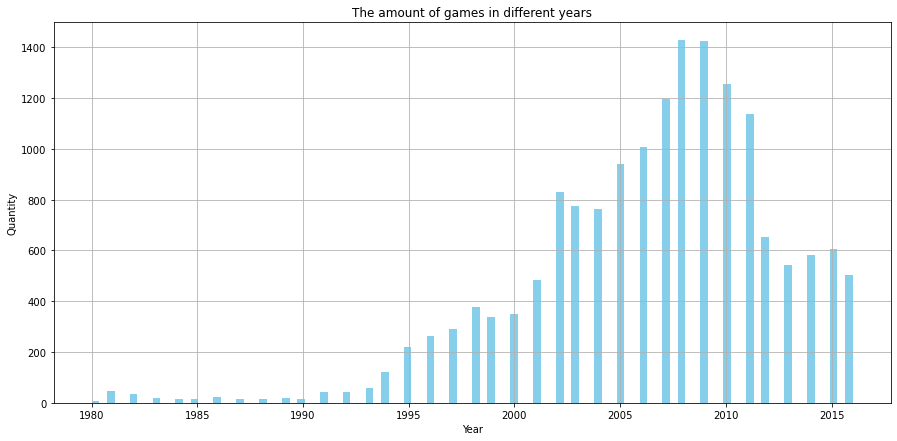

In [22]:
data['year_of_release'].hist(bins = 100, figsize = (15, 7), color='#87CEEB')

plt.title('The amount of games in different years')
plt.xlabel('Year') 
plt.ylabel('Quantity')
plt.show()

The active peak of growth in the release of games began in the 2000s.

Probably the most relevant data will be data from ~ 2014 to 2016 - this period reflects the current trends in the gaming market.

The data before 1995 is absolutely irrelevant, since games were just starting to appear. They were not popular due to the lack of technical capacities for their development and usage, and their number is not comparable to any of the periods over the past 20 years.

In the 2000s, there was a rapid increase in the level of hardware capabilities of gaming hardware, provoking a greater growth in computer games, new players entered the market (for example, Microsoft with X360), existing players began to update their consoles (for example, Sony with PS2, PS3 ). Games have become more accessible, an alternative has appeared in the form of personal computers.
 

Since the 2010s, there has been a decline in demand for games in general across the listed platforms because mobile platforms have created a new sales channel. In addition to amateur gamers purposefully buying a console or PC games, there is a category of "a person who spends time on the subway on his way to work playing on his smartphone". This has resulted in the functional simplification of games in order to adapt them to the limited capabilities of the phone compared to the joystick or keyboard. The interest of users has shifted to this area, which was reflected in the drop in sales of computer games on various platforms.

### 2. Changes in sales by platform. Select the platforms with the highest total sales and plot the distribution by year. How long does it take for new platforms to appear and old ones to disappear?

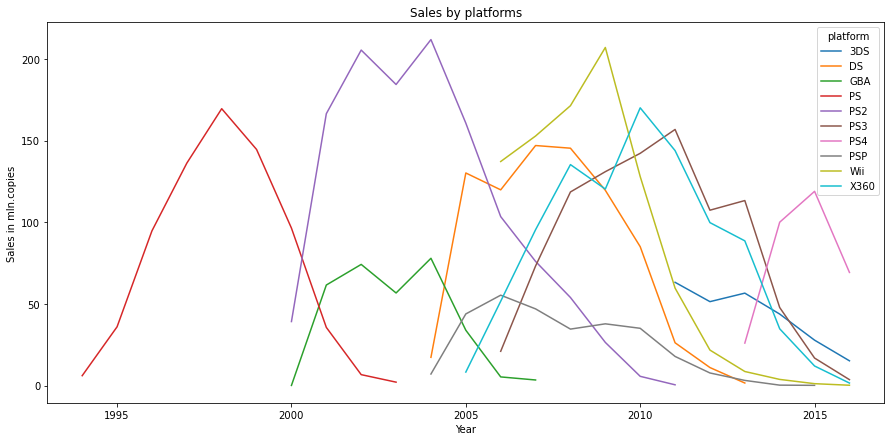

In [23]:
#collect data by platform and sort by sales
filtered_by_platform = data.pivot_table(index='platform', values='total_sales', aggfunc= 'sum')\
.sort_values('total_sales', ascending=False)

#create a list of the first 10 top platforms
new = filtered_by_platform.index[:10].tolist()

#create a dataset for the selected platforms
top10 = data.query('platform == @new')

#build a graph of sales among these platforms by years
pd.pivot_table(top10 , index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(figsize=(15,7), xlim=(1993,2017))

plt.title('Sales by platforms')
plt.xlabel('Year') 
plt.ylabel('Sales in mln.copies')
plt.show()

In [24]:
#calculate the duration of the "life" of the platform by the difference between the maximum and minimum release year
platform_max = data.groupby('platform')['year_of_release'].max()
platform_min = data.groupby('platform')['year_of_release'].min()
platform_lifetime = platform_max - platform_min
display(platform_lifetime.sort_values(ascending=False))
display(platform_lifetime.mean())
display(platform_lifetime.median())

platform
PC      31
DS      28
GB      13
X360    11
PSP     11
PS2     11
NES     11
DC      10
Wii     10
PS3     10
2600     9
SNES     9
PS       9
XB       8
GBA      7
GC       6
N64      6
3DS      5
PSV      5
SAT      5
WiiU     4
GEN      4
NG       3
XOne     3
PS4      3
WS       2
3DO      1
SCD      1
TG16     0
PCFX     0
GG       0
Name: year_of_release, dtype: int64

7.612903225806452

6.0

According to the graph and the table, the average "life" of gaming platforms is 6-7 years. There are platforms that are most popular (for example, X360, PS2, PS3) and live longer - an average of 10-13 years.

### 3. Which platforms are leading in sales, rising or falling? Pick a few potentially profitable platforms.

Since the gaming platform market is very dynamic, we define the current period as follows:
1. deadline - 2016
2. start date - 2014.

Now let's calculate which platforms are leading in this period. We will limit ourselves to the top 5 most popular platforms (it is about 87% of all copies of games sold) so that the graphics are more visual and accessible for analysis.

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


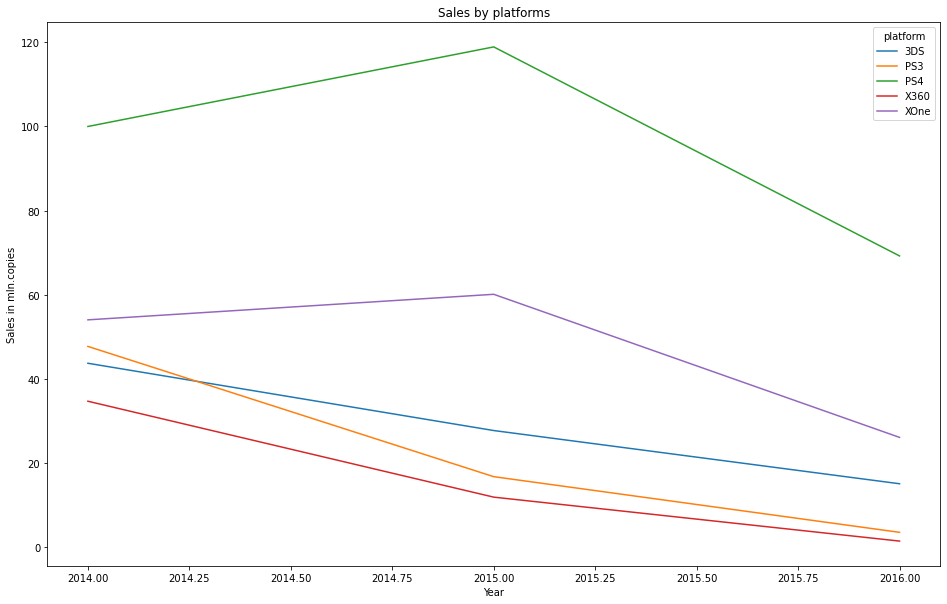

In [25]:
#see what platforms are popular during this period

top5_platforms_2014_2016 = data.query('year_of_release >=2014')\
.pivot_table(index='platform', values='total_sales', aggfunc= 'sum')\
.sort_values('total_sales', ascending=False)

display(top5_platforms_2014_2016.head())

#create a list of the first 5 top platforms
top_5_list = top5_platforms_2014_2016.index[:5].tolist()


#create a dataset for the selected platforms
top_5 = data.query('platform == @top_5_list and year_of_release>=2014')


#build a chart on the dynamics of sales for each of the platforms for the current period
pd.pivot_table(top_5, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(figsize=(16,10))
plt.title('Sales by platforms')
plt.xlabel('Year') 
plt.ylabel('Sales in mln.copies')
plt.show()

The most popular platforms, based on their estimated revenue, are:
1. PS4
2. XOne
3. 3DS
4. PS3
5. X360

As it could be seen from the graph, all platforms are experiencing a decrease in sales. The exception may be PS4 and XOne, which showed an increase in 2015, becuse the decrease in 2016 may be due to incomplete data for this period.
In general, the dynamics could be due to the fact that these are one of the newest platforms, therefore interest in them can only be gainig, while the rest of the platforms may have already passed the peak of their popularity and maximum sales.

### 4. Create a boxplot of global game sales by platform.

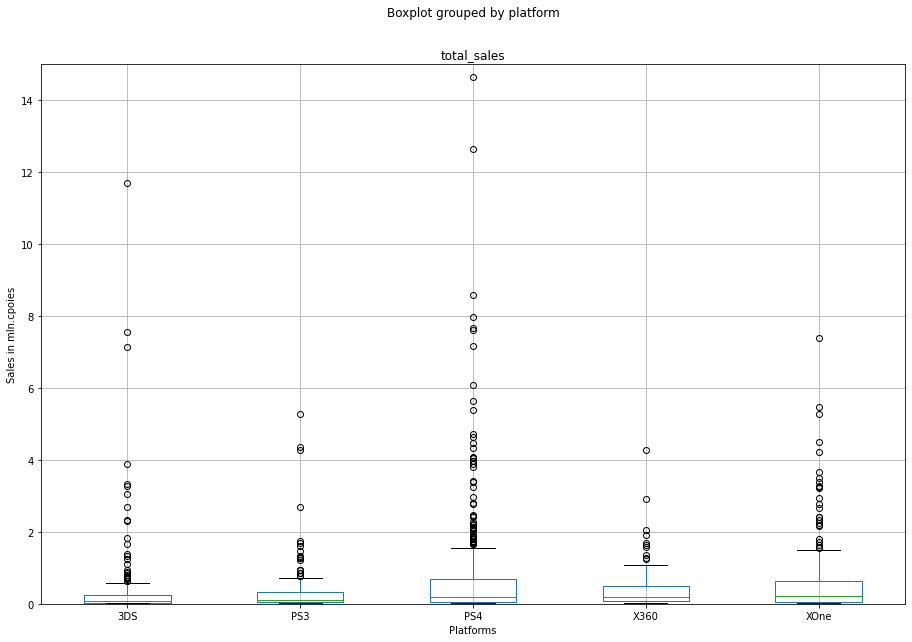

In [26]:
boxplot = top_5.boxplot(column=['total_sales'], by='platform', figsize=(15,10)).set_ylim(0, 15)


plt.xlabel('Platforms') 
plt.ylabel('Sales in mln.cpoies')
plt.show()

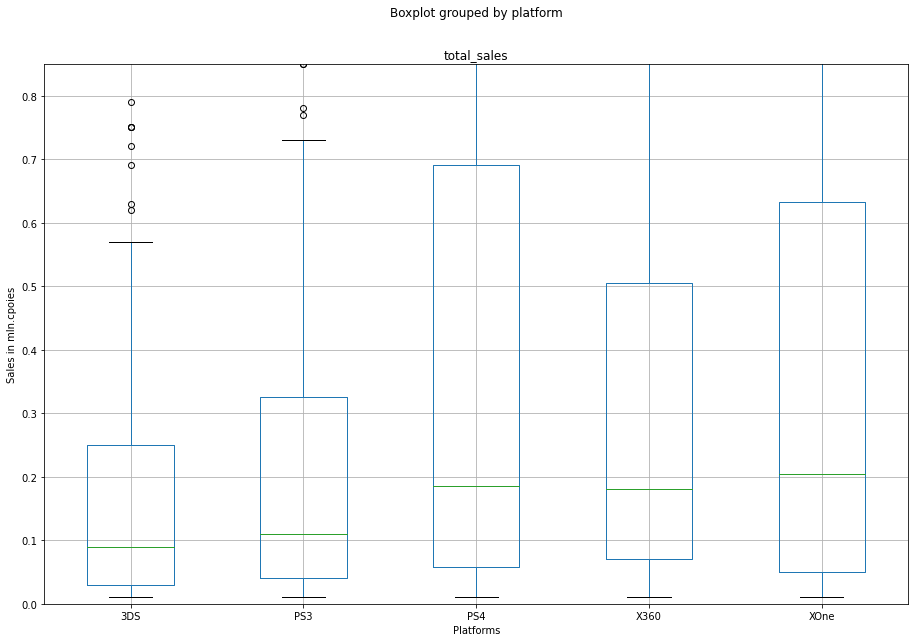

In [27]:
boxplot = top_5.boxplot(column=['total_sales'], by='platform', figsize=(15,10)).set_ylim(0, 0.85)

plt.xlabel('Platforms') 
plt.ylabel('Sales in mln.cpoies')
plt.show()

Most part of the sales is outlier values, which is determined by the specific gaming industry - the company releases a certain game and collects large sales volumes of the release. The number of games that are bought constantly and fast is insignificant, which can be seen on the graph.

According to the enlarged graph with quartiles, we can see that PS4 has the maximum number of games among the presented platforms that fall into the 75% interval, while the maximum median is for XOne.


### 5. How do reviews from users and critics affect sales within one popular platform. Plot a scatterplot and calculate the correlation between reviews and sales.

1. X360

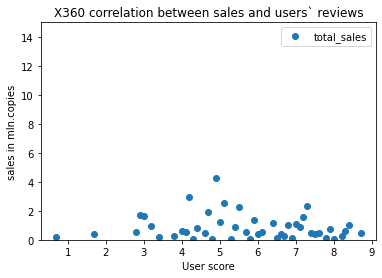

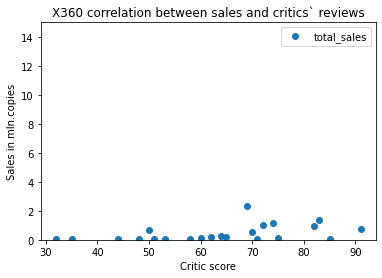

In [28]:
top_5.query('platform == "X360"').pivot_table(index = ['user_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('X360 correlation between sales and users` reviews')
plt.xlabel('User score') 
plt.ylabel('sales in mln.copies')
plt.show()


top_5.query('platform == "X360"').pivot_table(index = ['critic_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('X360 correlation between sales and critics` reviews')
plt.xlabel('Critic score') 
plt.ylabel('Sales in mln.copies')
plt.show()



Let's calculate the sales correlation depending on the feedback from users and critics in the current period. 

In [29]:
top_5_by_platform = top_5.query('platform == "X360"')
top_5_by_platform[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


The calculation was confirmed by a scatterplot: there was no significant correlation between sales and reviews from users and critics. At the same time, we see that a direct linear correlaction is stronger with reviews from critics, rather than reviews from users.

2. PS3

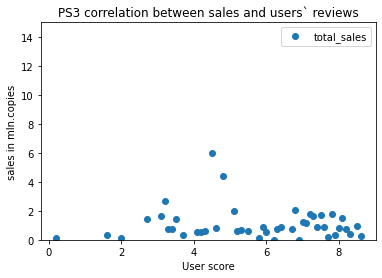

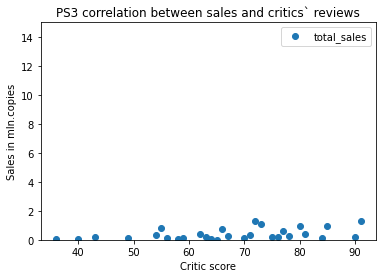

In [30]:
top_5.query('platform == "PS3"').pivot_table(index = ['user_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('PS3 correlation between sales and users` reviews')
plt.xlabel('User score') 
plt.ylabel('sales in mln.copies')
plt.show()


top_5.query('platform == "PS3"').pivot_table(index = ['critic_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('PS3 correlation between sales and critics` reviews')
plt.xlabel('Critic score') 
plt.ylabel('Sales in mln.copies')
plt.show()


Let's calculate the sales correlation depending on the feedback from users and critics in the current period. 

In [31]:
top_5_by_platform = top_5.query('platform == "PS3"')
top_5_by_platform[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


The calculation was confirmed by a scatterplot: there was no significant correlation between sales and reviews from users and critics. At the same time, we see that a direct linear correlaction is stronger with reviews from critics, rather than reviews from users.

3. XOne

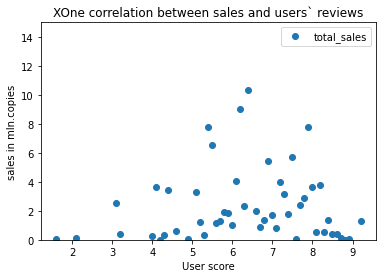

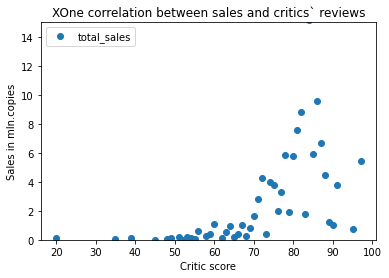

In [32]:
top_5.query('platform == "XOne"').pivot_table(index = ['user_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('XOne correlation between sales and users` reviews')
plt.xlabel('User score') 
plt.ylabel('sales in mln.copies')
plt.show()


top_5.query('platform == "XOne"').pivot_table(index = ['critic_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('XOne correlation between sales and critics` reviews')
plt.xlabel('Critic score') 
plt.ylabel('Sales in mln.copies')
plt.show()

Let's calculate the sales correlation depending on the feedback from users and critics in the current period. 

In [33]:
top_5_by_platform = top_5.query('platform == "XOne"')
top_5_by_platform[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


The calculation was confirmed by a scatterplot: there was no significant correlation between sales and reviews from users and critics. At the same time, we see that a direct linear correlaction is stronger with reviews from critics, rather than reviews from users.

4. 3DS

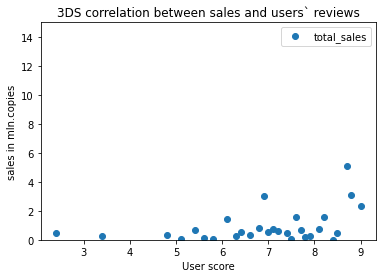

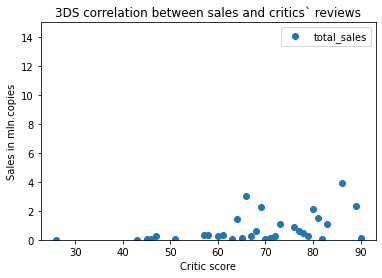

In [34]:
top_5.query('platform == "3DS"').pivot_table(index = ['user_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('3DS correlation between sales and users` reviews')
plt.xlabel('User score') 
plt.ylabel('sales in mln.copies')
plt.show()


top_5.query('platform == "3DS"').pivot_table(index = ['critic_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('3DS correlation between sales and critics` reviews')
plt.xlabel('Critic score') 
plt.ylabel('Sales in mln.copies')
plt.show()

Let's calculate the sales correlation depending on the feedback from users and critics in the current period. 

In [35]:
top_5_by_platform = top_5.query('platform == "3DS"')
top_5_by_platform[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


The calculation was confirmed by a scatterplot: there was no significant correlation between sales and reviews from users and critics. At the same time, we see that a direct linear correlaction is stronger with reviews from critics, rather than reviews from users.

5. PS4

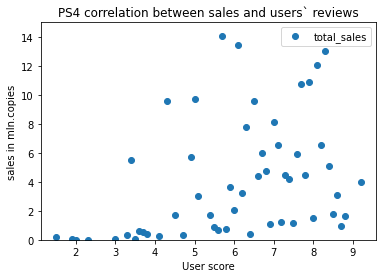

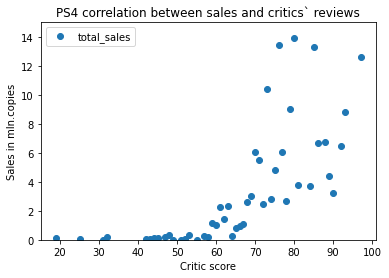

In [36]:
top_5.query('platform == "PS4"').pivot_table(index = ['user_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('PS4 correlation between sales and users` reviews')
plt.xlabel('User score') 
plt.ylabel('sales in mln.copies')
plt.show()


top_5.query('platform == "PS4"').pivot_table(index = ['critic_score'], values = 'total_sales', aggfunc = 'sum')\
    .plot(style='o', ylim=(0,15))
plt.title('PS4 correlation between sales and critics` reviews')
plt.xlabel('Critic score') 
plt.ylabel('Sales in mln.copies')
plt.show()

Let's calculate the sales correlation depending on the feedback from users and critics in the current period. 

In [37]:
top_5_by_platform = top_5.query('platform == "PS4"')
top_5_by_platform[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


The calculation was confirmed by a scatterplot: there was no significant correlation between sales and reviews from users and critics. At the same time, we see that a direct linear correlaction is stronger with reviews from critics, rather than reviews from users.

**Conclusion**

In general, no pronounced linear correlaction between sales and reviews was revealed (none of the correlation coefficients exceeded even 0.5). At the same time, it was found that in most cases, a direct linear correlation  between sales and reviews from critics is stronger than between user reviews.
   

### 6. General distribution of games by genre. What about the most profitable genres? Do genres with high and low sales stand out?

Let's select all the platforms in the current period and see how many genres there are in total to make sure we don't miss anything:

In [38]:
actual_data = data.query('year_of_release >= 2014')

In [39]:
len(actual_data['genre'].unique())

12

Let's take a look at game sales by genre. 

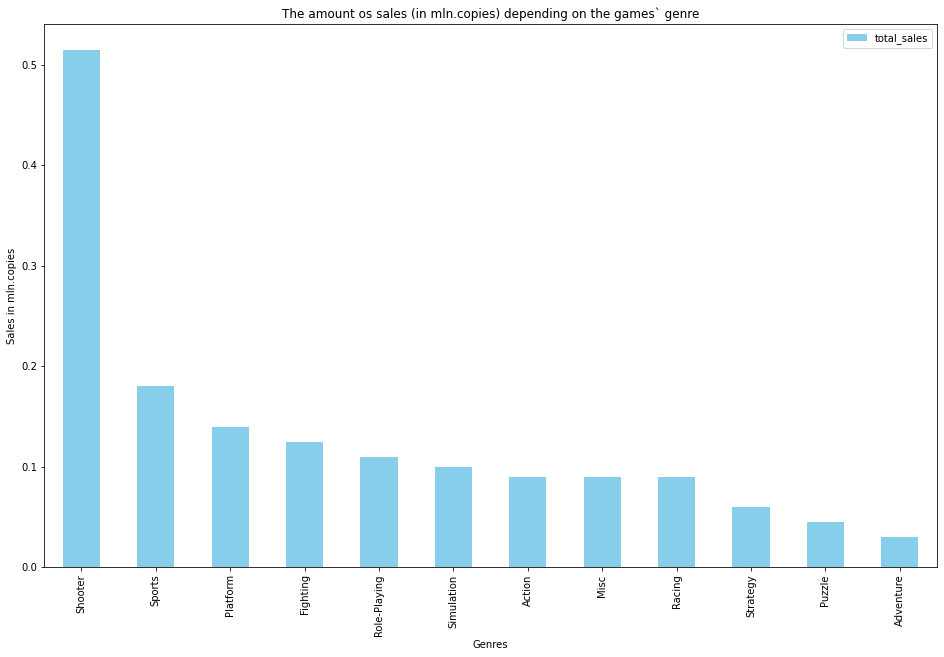

In [40]:
actual_data.groupby(by='genre').agg({'total_sales':'median'})\
                         .sort_values(by='total_sales', ascending=False)\
                         .plot(kind='bar', figsize=(16,10), color=['#87CEEB','#4682B4'])
plt.title('The amount os sales (in mln.copies) depending on the games` genre')
plt.xlabel('Genres') 
plt.ylabel('Sales in mln.copies')
plt.show()

The most popular genre - shooter. 

Top-5 genres are: shooter, sports, platform, fighting и role-playing

The least popular genres:  strategy, puzzle, аdventure. 


**Step 3. Conclusion.**

As part of this step, the current period from 2014 to 2016 was determined (because the industry is changing very dynamically) and there are several outcomes:

1. The general dynamics of games is negative, the number of copies sold has been falling in recent years, which may be caused by a shift in the focus of user interests towards, for example, mobile games.
2. The most popular platforms are determined as: PS4, XOne, 3DS, PS3, X360.
3. It was found that there is no strong linear correlation between the reviews of both critics and users, and sales, while the linear corralation with critics' reviews is stronger than with user reviews.
4. The distribution of sales by genre was determined: the most popular - shooter, the most unpopular - adventure.

## Step 4. Create a user profile for each region

### 1.The most popular platforms (top-5). Describe the differences in sales shares.

**Popular platforms in North America**

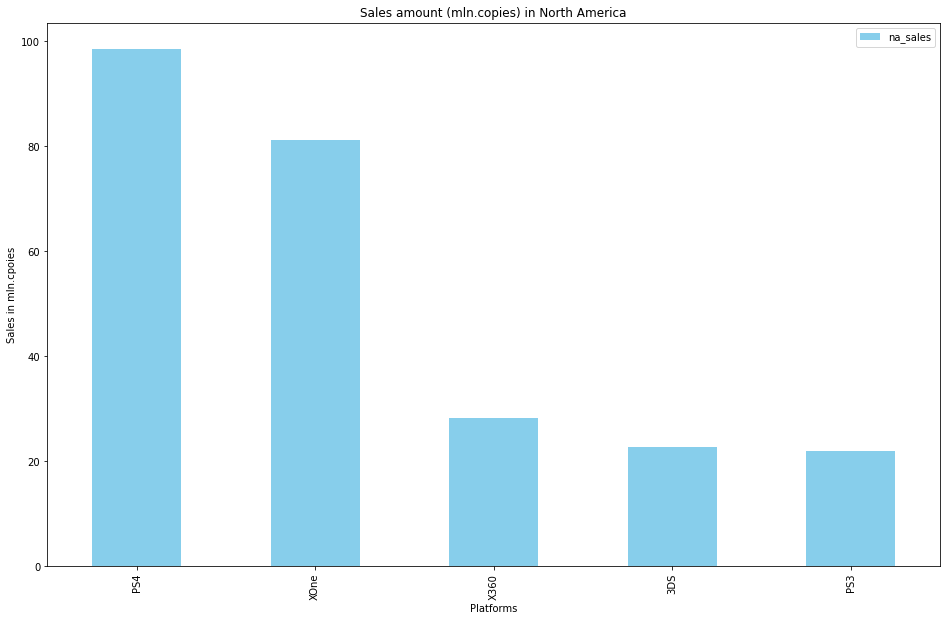

In [41]:
actual_data.groupby(by='platform').agg({'na_sales':'sum'})\
                         .sort_values(by='na_sales', ascending=False).head()\
                         .plot(kind='bar', figsize=(16,10), color = '#87CEEB')
plt.title('Sales amount (mln.copies) in North America')
plt.xlabel('Platforms') 
plt.ylabel('Sales in mln.cpoies')
plt.show()

**Popular genres in North America**

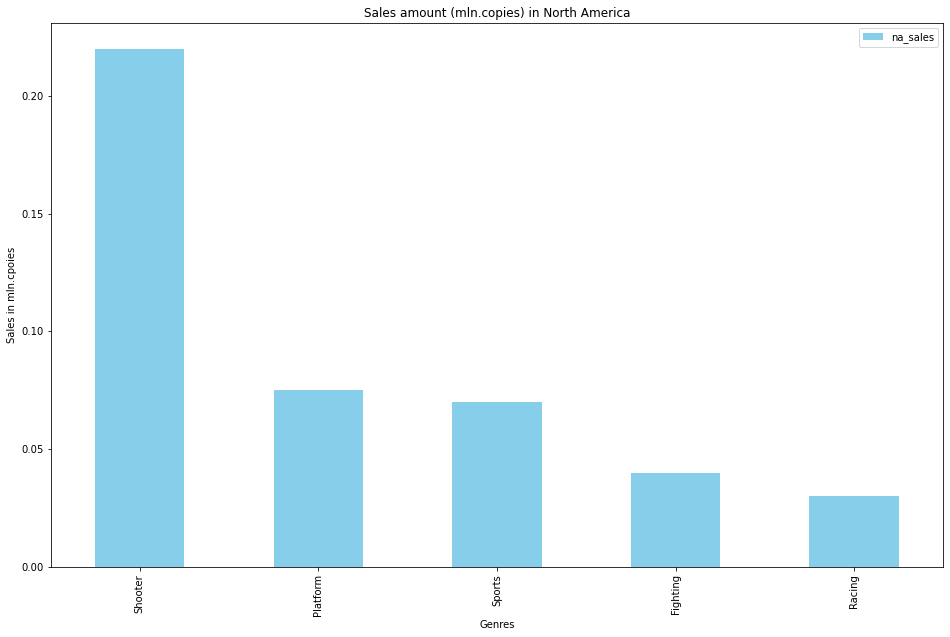

In [42]:
actual_data.groupby(by='genre').agg({'na_sales':'median'})\
                         .sort_values(by='na_sales', ascending=False).head()\
                         .plot(kind='bar', figsize=(16,10), color = '#87CEEB')
plt.title('Sales amount (mln.copies) in North America')
plt.xlabel('Genres') 
plt.ylabel('Sales in mln.cpoies')
plt.show()

In North America, the most popular gaming platform is PS4, the most popular genre is shooter.

**Popular platforms in Europe**

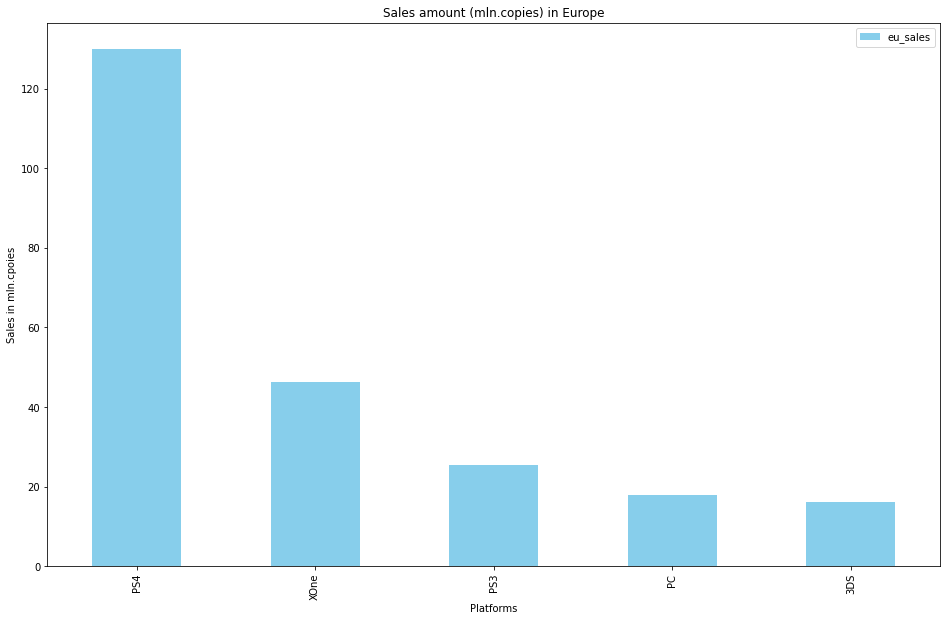

In [43]:
actual_data.groupby(by='platform').agg({'eu_sales':'sum'})\
                         .sort_values(by='eu_sales', ascending=False).head()\
                         .plot(kind='bar', figsize=(16,10), color = '#87CEEB')
plt.title('Sales amount (mln.copies) in Europe')
plt.xlabel('Platforms') 
plt.ylabel('Sales in mln.cpoies')
plt.show()

**Popular genres in Europe**

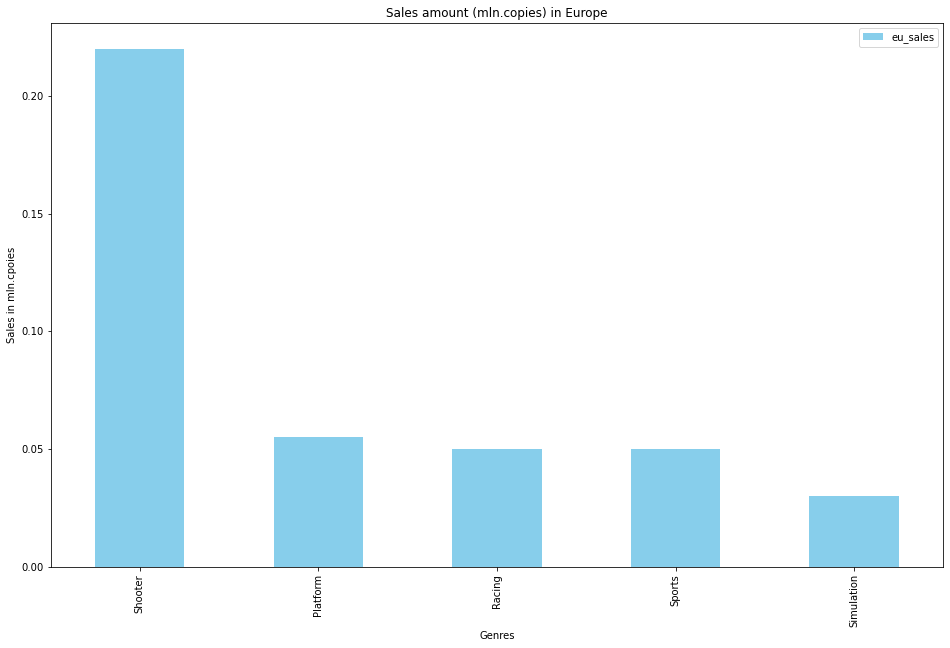

In [44]:
actual_data.groupby(by='genre').agg({'eu_sales':'median'})\
                         .sort_values(by='eu_sales', ascending=False).head()\
                         .plot(kind='bar', figsize=(16,10), color = '#87CEEB')
plt.title('Sales amount (mln.copies) in Europe')
plt.xlabel('Genres') 
plt.ylabel('Sales in mln.cpoies')
plt.show()

The most popular gaming platform in Europe is PS4, the popular genre is shooter.

**Popular platforms in Japan**

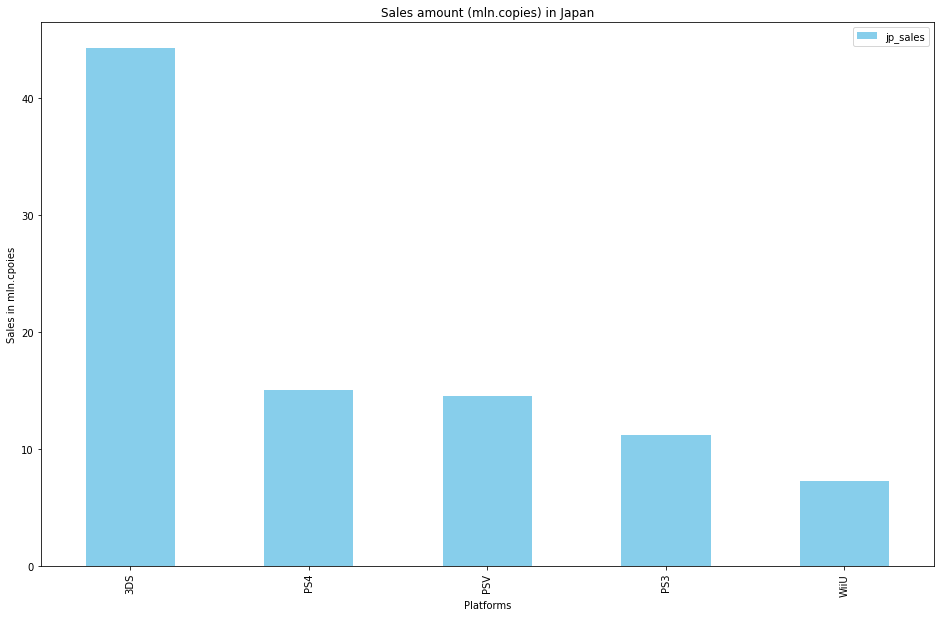

In [45]:
actual_data.groupby(by='platform').agg({'jp_sales':'sum'})\
                         .sort_values(by='jp_sales', ascending=False).head()\
                         .plot(kind='bar', figsize=(16,10), color = '#87CEEB')
plt.title('Sales amount (mln.copies) in Japan')
plt.xlabel('Platforms') 
plt.ylabel('Sales in mln.cpoies')
plt.show()

**Popular genres in Japan**

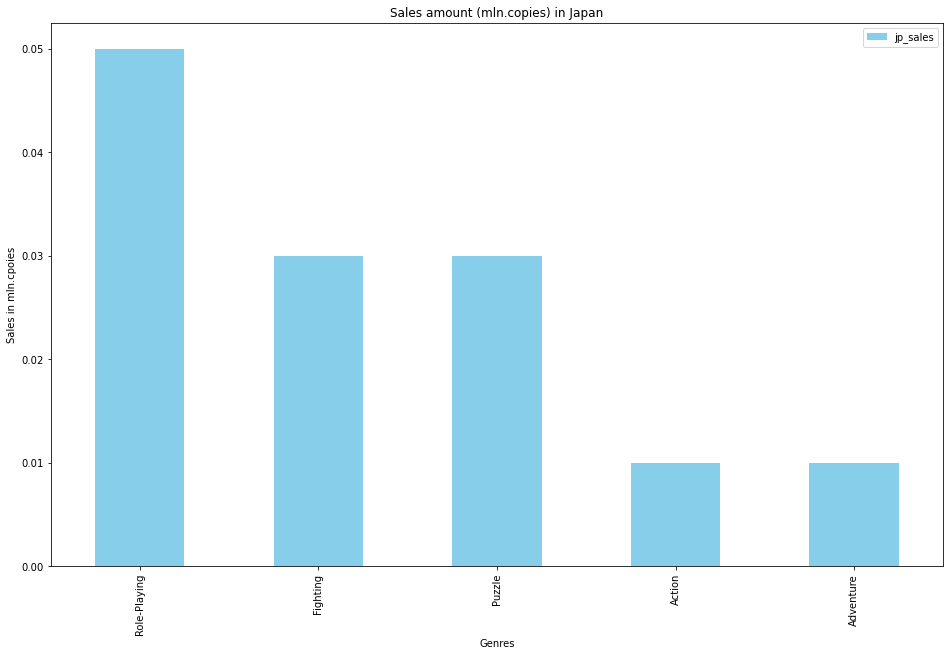

In [46]:
actual_data.groupby(by='genre').agg({'jp_sales':'median'})\
                         .sort_values(by='jp_sales', ascending=False).head()\
                         .plot(kind='bar', figsize=(16,10), color = '#87CEEB')
plt.title('Sales amount (mln.copies) in Japan')
plt.xlabel('Genres') 
plt.ylabel('Sales in mln.cpoies')
plt.show()

The most popular gaming platform in Japan is 3DS, the popular genre is role-playing.

**The impact of the ESRB rating on sales in the region**

In [47]:
by_rating = actual_data.groupby(['rating'])\
.agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum', 'total_sales':'sum'})\
.sort_values(by='total_sales', ascending=False).head(5)
display(by_rating)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
rating,,,,,
M,96.42,93.44,8.01,28.67,226.54
Нет рейтинга,64.72,58.95,56.90,18.40,198.97
E,50.74,58.06,8.94,15.39,133.13
T,38.95,34.07,14.78,11.33,99.13
E10+,33.23,26.16,4.46,7.83,71.68


According to the distribution of sales, there is a completely logical pattern that, in general, according to all data, there are more games sold with an M('mature') rating among those for which the rating is determined, since the most solvent target audience is represented.

In Japan, the most of the market is not categorized, but T('teens') sales are in first place because it is likely that teens are more immersed in the gaming industry than adults (as a hypothesis - this can be explained by overly busy work schedules among adults in Japan ).

In North America and Europe, most of those rated are M, followed by E ('everyone').


**Step 4. Conclusion**

1. The popularity of platforms differs from the region of presence.

In North America and Europe the most popular platform is PS4, in Japan - 3DS.

2. The popularity of genres also differs from the region of presence.

Most popular genres: North America and Europe - shooter, Japan - role-playing.

3. The popularity of the rating also varies slightly depending on the region:

The largest sales among the games for which the rating is determined: in North America and Europe - M and E ratings, in Japan - T.


## Step 5. Hypothesis testing

### 1. The average user ratings of the Xbox One and PC platforms are the same

 - H_o: The average user ratings Xbox = PC
 - H_1: The average user ratings Xbox != PC 

We need to test the hypothesis that the mean of two populations is equal based on the samples taken from them, so we use Student's t-test (ttest_ind() method).

In [48]:
x360 = actual_data.query('platform == "X360" and user_score>=0')['user_score']

PC = actual_data.query('platform == "PC" and user_score>=0')['user_score']

In [49]:
results = st.ttest_ind(x360,PC,equal_var=False)

alpha = 0.05

#print the p-value
print(results.pvalue)
# conditional statement with the output of a string with the answer
if results.pvalue<alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

0.0312821899616337
Rejecting the null hypothesis


We can say with 95% confidence that the average user rating on PC is not equal to the average user rating on Xbox.

### 2. The average user ratings for the Action and Sports genres are different

 - H_o: The average user ratuing Action = Sports
 - H_1: The average user ratuing Action != Sports

In [50]:
action = actual_data.query('genre == "Action" and user_score>=0')['user_score']

sports = actual_data.query('genre == "Sports" and user_score>=0')['user_score']

In [51]:
results = st.ttest_ind(action,sports,equal_var=False)

alpha = 0.05

#print the p-value
print(results.pvalue)
# conditional statement with the output of a string with the answer
if results.pvalue<alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

1.1825550382644557e-14
Rejecting the null hypothesis


We can say with 95% confidence that the average user rating in the Action genre is not equal to the average user rating in the Sports genre.

**Step.5 Conclusion**

As part of the study, 2 hypotheses were tested, according to the test results, we came to the conclusion that with a 95% confidence probability we can state that:
1. PC and X360 average user ratings are not equal
2. The average user ratings for the action and sports genres are not equal.

## Step  6. Conclusion

As part of this work, we analyzed the available historical data on game sales by genre and platform.
 
The computer games market is very dynamic, the average life span of a set-top box is generally about 7 years, over the past 20 years, the leaders in the gaming platform market have changed several times.

In general, the trends in the gaming platform market are not the most favorable for the Strimchik online store, since for the last 5 years there has been an active trend in reducing the number of sold copies of games on the platforms. One likely reason for this trend could be a shift in consumer focus towards mobile games.


**To evaluate potentially successful areas for sales in the Strimchik online store, we came to the following conclusions:**

*1.Platform selection*

The most promising platforms at the moment are PS4 and XOne, they appeared relatively recently and, in comparison with other platforms, showed good sales dynamics in 2015. Given the average life expectancy, games on these platforms will remain in demand longer compared to others, as most platforms are already showing an active decline in the number of copies sold.

*2. Genre selection*

In general, the most popular genres are:
- shooter
- sports
- platform
- fighting
- role-playing

The least popular genres are:
- strategy
- puzzle
- adventure

*3. Age category selection (in accordance with rating from ESRB):*

Most played games rated M ('mature').

Least played games rated E10+ ('everyone who is older 10 y/o').

*4. The impact of reviews on game sales*

In general, a strong linear correlation between reviews and game sales was not found in the analysis.
At the same time, it should be noted that a linear correlation is stronger for reviews from critics and sales, so when choosing games for sale based on reviews, you should first take into account reviews from critics.


**However, when considering the parameters of games for sale, it is necessary to target the region where games are sold, since the specifics of the regions affect the sales of games..** 

Below are the "portraits" of buyers, divided into 3 main analyzed regions:

*North America:*

1. Popular platform: PS4 
2. Popular genre: shooter
3. Popular age category: M и E

*Europe:*

1. Popular platform: PS4 
2. Popular genre: shooter
3. Popular age category: M и E

*Japan:*

1. Popular platform: 3DS
2. Popular genre: role-playing
3. Popular age category: T 




